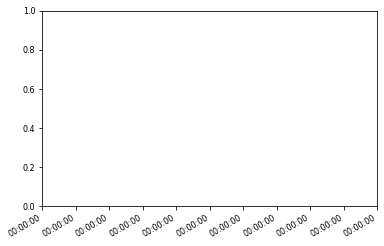

In [293]:
#Import required libraries
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import matplotlib.dates
import matplotlib.ticker as ticker
import pandas as pd

# Aesthetic parameters
plt.rcParams.update({'font.size': 8})
plt.rcParams['lines.linewidth'] = 1.5
time_format = matplotlib.dates.DateFormatter('%H:%M:%S')
plt.gca().xaxis_date()
plt.gca().xaxis.set_major_formatter(time_format)
plt.gcf().autofmt_xdate()

In [294]:
#Declare variables to hold cpu metrics

# Time (column 0)
x = []
# Data arrays
user_cpu = []
system_cpu = []
idle_cpu = []

       Time  CPU  %user  %nice  %system  %iowait  %steal  %idle
0  09:35:16  all   0.04    0.0     0.23     0.00     0.0  99.72
1  09:35:17  all   0.05    0.0     0.13     0.00     0.0  99.82
2  09:35:18  all   0.06    0.0     0.13     0.00     0.0  99.81
3  09:35:19  all   0.06    0.0     0.13     0.00     0.0  99.81
4  09:35:20  all   0.05    0.0     0.13     0.01     0.0  99.82
5  09:35:21  all   0.05    0.0     0.14     0.00     0.0  99.81
6  09:35:22  all   0.05    0.0     0.13     0.00     0.0  99.82
7  09:35:23  all   0.04    0.0     0.13     0.00     0.0  99.82
8  09:35:24  all   0.05    0.0     0.13     0.00     0.0  99.82
9  09:35:25  all   0.05    0.0     0.13     0.00     0.0  99.82


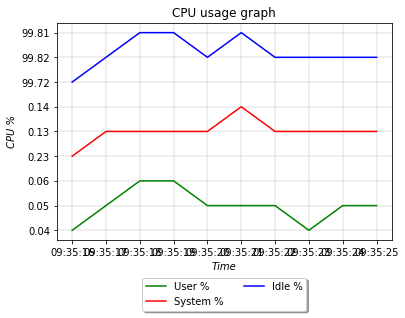

In [295]:
%matplotlib inline

with open('/root/ashish/sar_analyzer/data/cpu.dat', 'r') as csvfile:
    data_source_1 = pd.read_csv(csvfile,header=None, sep=" ", skipinitialspace = True, names = ["Time","CPU", "%user", "%nice",  "%system", "%iowait", "%steal", "%idle"])
    print(data_source_1)
    
with open('/root/ashish/sar_analyzer/data/cpu.dat', 'r') as csvfile:
   data_source = csv.reader(csvfile, delimiter=' ', skipinitialspace=True)
   for row in data_source:
      # [0] column is a time column
      # Convert to datetime data type
      a = datetime.strptime((row[0]),'%H:%M:%S')
      x.append((a))
      # The remaining columns contain data
      user_cpu.append(row[2])
      system_cpu.append(row[4])
      idle_cpu.append(row[7])

# Plot lines
plt.plot(x,user_cpu, label='User %', color='g', antialiased=True)
plt.plot(x,system_cpu, label='System %', color='r', antialiased=True)
plt.plot(x,idle_cpu, label='Idle %', color='b', antialiased=True)

# Graph properties
plt.xlabel('Time',fontstyle='italic')
plt.ylabel('CPU %',fontstyle='italic')
plt.title('CPU usage graph')
plt.grid(linewidth=0.4, antialiased=True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fancybox=True, shadow=True)
plt.autoscale(True)

# Graph saved to PNG file
#plt.savefig('../../graphs/cpu.png', bbox_inches='tight')
plt.show()

In [296]:
# Declaring variables to analyze Memory...
# Time (column 0)
x = []
# Memory data arrays
free_mem = []
used_mem = []
buffer_mem = []
cached_mem = []

       Time   kbmemfree   kbmemused  %memused  kbbuffers    kbcached  \
0  09:35:16  5079394960  1161546620     18.61      26596  1107003824   
1  09:35:17  5079394216  1161547364     18.61      26596  1107003852   
2  09:35:18  5079394404  1161547176     18.61      26596  1107003860   
3  09:35:19  5079394320  1161547260     18.61      26596  1107003880   
4  09:35:20  5079394048  1161547532     18.61      26596  1107003904   
5  09:35:21  5079393992  1161547588     18.61      26596  1107003940   
6  09:35:22  5079393916  1161547664     18.61      26596  1107003960   
7  09:35:23  5079394096  1161547484     18.61      26596  1107003964   
8  09:35:24  5079394164  1161547416     18.61      26596  1107004000   
9  09:35:25  5079395804  1161545776     18.61      26596  1107004012   

   kbcommit  %commit  kbactive     kbinact  kbdirty  
0  16719616     0.27  38146548  1070825624      104  
1  16719184     0.27  38147492  1070825624      132  
2  16717420     0.27  38147464  1070825624   

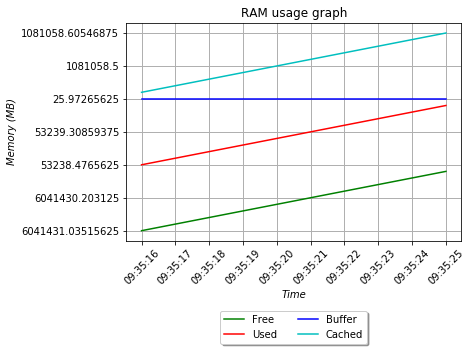

In [297]:
# Analyzing sar dump of memory output...
%matplotlib inline

with open('/root/ashish/sar_analyzer/data/ram.dat', 'r') as csvfile:
    data_source_1 = pd.read_csv(csvfile,header=None, sep=" ", skipinitialspace = True, names = ["Time","kbmemfree","kbmemused","%memused","kbbuffers", "kbcached", "kbcommit","%commit","kbactive","kbinact","kbdirty"])
    print(data_source_1)
    
with open('/root/ashish/sar_analyzer/data/ram.dat', 'r') as csvfile:
    data_source = csv.reader(csvfile, delimiter=' ', skipinitialspace=True)
    for row in data_source:
        # [0] column is a time column
        # Convert to datetime data type
        a = datetime.strptime((row[0]),'%H:%M:%S')
        x.append((a))
        # The remaining columns contain data
        free_mem.append(str((int(row[1])/1024)+(int(row[4])/1024)+(int(row[5])/1024)))
        used_mem.append(str((int(row[2])/1024)-(int(row[4])/1024)-(int(row[5])/1024)))
        buffer_mem.append(str(int(row[4])/1024))
        cached_mem.append(str(int(row[5])/1024))

# Plot lines
plt.plot(x,free_mem, label='Free', color='g', antialiased=True)
plt.plot(x,used_mem, label='Used', color='r', antialiased=True)
plt.plot(x,buffer_mem, label='Buffer', color='b', antialiased=True)
plt.plot(x,cached_mem, label='Cached', color='c', antialiased=True)

# Graph properties
plt.xlabel('Time',fontstyle='italic')
plt.ylabel('Memory (MB)',fontstyle='italic')
plt.title('RAM usage graph')
plt.grid(linewidth=1.0, antialiased=True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.30), ncol=2, fancybox=True, shadow=True)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))
#plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.xticks(rotation=45)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
#plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))

# Graph saved to PNG file
#plt.savefig('../../graphs/ram.png', bbox_inches='tight')
plt.show()


In [298]:
# Declaring variables to analyze Network...
# Time (column 0)
x = []
# Data arrays
r_kb = []
s_kb = []

       Time  IFACE  rxpck/s  txpck/s  rxkB/s  txkB/s  rxcmp/s  txcmp/s  \
0  09:35:16  bond0    244.0     11.0   14.88    1.06      0.0      0.0   
1  09:35:17  bond0    345.0     10.0   20.25    1.14      0.0      0.0   
2  09:35:18  bond0    347.0     10.0   20.37    1.15      0.0      0.0   
3  09:35:19  bond0    347.0     10.0   20.36    1.14      0.0      0.0   
4  09:35:20  bond0    192.0      8.0   11.28    0.80      0.0      0.0   
5  09:35:21  bond0    246.0      9.0   14.41    1.03      0.0      0.0   
6  09:35:22  bond0    361.0     11.0   23.69    1.16      0.0      0.0   
7  09:35:23  bond0    361.0      8.0   21.15    0.95      0.0      0.0   
8  09:35:24  bond0    349.0     10.0   20.52    1.08      0.0      0.0   
9  09:35:25  bond0    198.0      9.0   12.43    1.07      0.0      0.0   

   rxmcst/s  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
5       0.0  
6       0.0  
7       0.0  
8       0.0  
9       0.0  


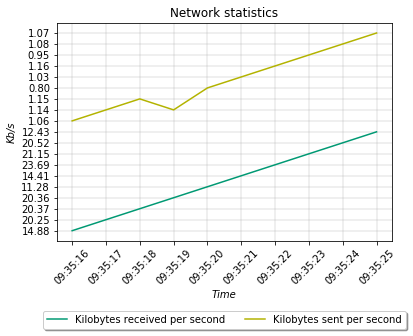

In [299]:
# Analyzing the sar output of network metrics...
%matplotlib inline

with open('/root/ashish/sar_analyzer/data/netinterface.dat', 'r') as csvfile:
    data_source_1 = pd.read_csv(csvfile,header=None, sep=" ", skipinitialspace = True, names = ["Time","IFACE","rxpck/s","txpck/s","rxkB/s","txkB/s","rxcmp/s","txcmp/s","rxmcst/s"])
    print(data_source_1)

with open('/root/ashish/sar_analyzer/data/netinterface.dat', 'r') as csvfile:    
    data_source = csv.reader(csvfile, delimiter=' ', skipinitialspace=True)
    for row in data_source:
        # [0] column is a time column
        # Convert to datetime data type
        a = datetime.strptime((row[0]),'%H:%M:%S')
        x.append((a))
        # The remaining columns contain data
        r_kb.append(row[4])
        s_kb.append(row[5])

# Plot lines
plt.plot(x,r_kb, label='Kilobytes received per second', color='#009973', antialiased=True)
plt.plot(x,s_kb, label='Kilobytes sent per second', color='#b3b300', antialiased=True)

# Graph properties
plt.xlabel('Time',fontstyle='italic')
plt.ylabel('Kb/s',fontstyle='italic')
plt.title('Network statistics')
plt.grid(linewidth=0.4, antialiased=True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.30), ncol=2, fancybox=True, shadow=True)
plt.autoscale(True)
plt.xticks(rotation=45)

# Graph saved to PNG file
#plt.savefig('../../graphs/netinterface.png', bbox_inches='tight')
plt.show()

In [300]:
# IOTransfer
# Time (column 0)
x = []
# Data arrays
b_read_second = []
b_written_second = []

       Time  tps  rtps  wtps  bread/sec  bwrite/sec
0  09:35:16  0.0   0.0   0.0        0.0         0.0
1  09:35:17  0.0   0.0   0.0        0.0         0.0
2  09:35:18  0.0   0.0   0.0        0.0         0.0
3  09:35:19  0.0   0.0   0.0        0.0         0.0
4  09:35:20  0.0   0.0   0.0        0.0         0.0
5  09:35:21  0.0   0.0   0.0        0.0         0.0
6  09:35:22  0.0   0.0   0.0        0.0         0.0
7  09:35:23  0.0   0.0   0.0        0.0         0.0
8  09:35:24  0.0   0.0   0.0        0.0         0.0
9  09:35:25  4.0   0.0   4.0        0.0       432.0


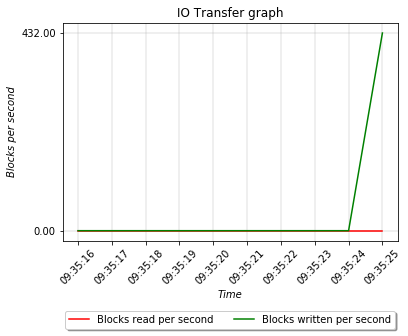

In [301]:
# Analyzing the sar output of I/O Transfer...
%matplotlib inline

with open('/root/ashish/sar_analyzer/data/iotransfer.dat', 'r') as csvfile:
    data_source_1 = pd.read_csv(csvfile,header=None, sep=" ", skipinitialspace = True, names = ["Time","tps","rtps","wtps","bread/sec","bwrite/sec"])
    print(data_source_1)

    
with open('/root/ashish/sar_analyzer/data/iotransfer.dat', 'r') as csvfile:
    #data_source_1 = pd.read_csv(csvfile,header=None, sep=" ", skipinitialspace = True, names = ["Time","tps","rtps","wtps","bread/sec","bwrite/sec"])
    data_source = csv.reader(csvfile, delimiter=' ', skipinitialspace=True)
    for row in data_source:
        # [0] column is a time column
        # Convert to datetime data type
        a = datetime.strptime((row[0]),'%H:%M:%S')
        x.append((a))
        # The remaining columns contain data
        b_read_second.append(row[4])
        b_written_second.append(row[5])

# Plot lines
plt.plot(x,b_read_second, label='Blocks read per second', color='r', antialiased=True)
plt.plot(x,b_written_second, label='Blocks written per second', color='g', antialiased=True)

# Graph properties
plt.xlabel('Time',fontstyle='italic')
plt.ylabel('Blocks per second',fontstyle='italic')
plt.title('IO Transfer graph')
plt.grid(linewidth=0.4, antialiased=True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.30), ncol=2, fancybox=True, shadow=True)
plt.autoscale(True)
plt.xticks(rotation=45)

# Graph saved to PNG file
#plt.savefig('../../graphs/iotransfer.png', bbox_inches='tight')
#print(data_source_1)
plt.show()